<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Exploratory Data Analysis Mini Project </h1>
     


<h4 class="list-group-item list-group-item-action active" >1. DESCRIPTIVE STATISTICS</h4>

>#### 1. Create a dataframe using below data and answer the below questions:

        Hourly_Income = [1000,2009,24418,444478,324235,243242,3434234,7567457,9235,238237,1312,3412]
        Hourly_Expense =  [651361,217371,2746,2356,13436,5732,346346,3463,1132,23534,242235,235235]
        family_members_count = [3,4,2,3,1,4,5,6,3,6,3,5]
        House_rent = [1299,2300,3411,3422,4566,4211,4600,736,672,0,734,2374]
        Highest_income_Member = ["Olivia","George","Isla","Harry","Ava","Noah","Sophia","Jacobi","Freddie","Ella","Grace","Ella"]
        
        
>##### A. Display the five point summary of the data. 
>##### B. What is the mean of the hourly expense?
>##### C. What is the median of the hourly expense?
>##### D. Find the family member with maximum income and using a suitable graph.
>##### E. Calculate IQR(the difference between 75% and 25% quartile) for `Hourly_Income` and `Hourly_Expense`.
>##### F. Calculate the standard deviation for first 2 columns.
>##### G. Calculate variance for the first 4 columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
    Hourly_Income = [1000,2009,24418,444478,324235,243242,3434234,7567457,9235,238237,1312,3412]
    Hourly_Expense =  [651361,217371,2746,2356,13436,5732,346346,3463,1132,23534,242235,235235]
    family_members_count = [3,4,2,3,1,4,5,6,3,6,3,5]
    House_rent = [1299,2300,3411,3422,4566,4211,4600,736,672,0,734,2374]
    Highest_income_Member = ["Olivia","George","Isla","Harry","Ava","Noah","Sophia","Jacobi","Freddie","Ella","Grace","Ella"]

In [3]:
df=pd.DataFrame({'Hourly_Income':Hourly_Income,'Hourly_Expense':Hourly_Expense,'family_members_count':family_members_count,
                'House_rent':House_rent,'Highest_income_Member':Highest_income_Member})

**A. Display the five point summary of the data.**

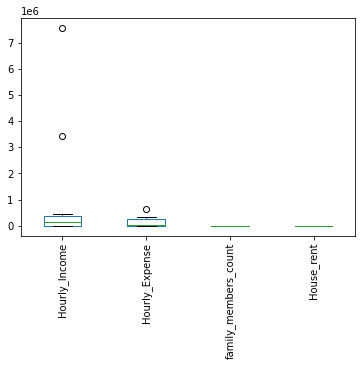

In [4]:
df.plot(kind='box',rot=90)
plt.show()

**B. What is the mean of the hourly expense?**

In [5]:
df['Hourly_Expense'].mean()

145412.25

**C. What is the median of the hourly expense?**

In [6]:
df['Hourly_Expense'].median()

18485.0

In [11]:
df.columns

Index(['Hourly_Income', 'Hourly_Expense', 'family_members_count', 'House_rent',
       'Highest_income_Member'],
      dtype='object')

**D. Find the family member with maximum income and using a suitable graph.**

In [7]:
df.groupby('Highest_income_Member')['Hourly_Income'].agg(max)

Highest_income_Member
Ava         324235
Ella        238237
Freddie       9235
George        2009
Grace         1312
Harry       444478
Isla         24418
Jacobi     7567457
Noah        243242
Olivia        1000
Sophia     3434234
Name: Hourly_Income, dtype: int64

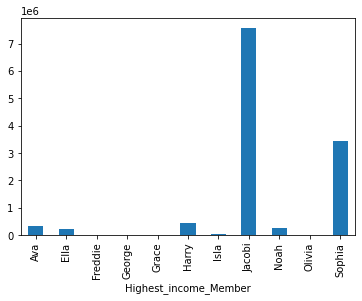

In [8]:
df.groupby('Highest_income_Member')['Hourly_Income'].agg(max).plot(kind='bar')
plt.show()

**E. Calculate IQR(the difference between 75% and 25% quartile) for Hourly_Income and Hourly_Expense.**

In [9]:
# Hourly_income
print('IQR for Hourly income is',df['Hourly_Income'].quantile(0.75)-df['Hourly_Income'].quantile(0.25))
# Hourly expence
print('IQR for Hourly expense is',df['Hourly_Expense'].quantile(0.75)-df['Hourly_Expense'].quantile(0.25))

IQR for Hourly income is 351234.5
IQR for Hourly expense is 233701.25


**F. Calculate the standard deviation for first 2 columns**

In [10]:
df.iloc[:,:2].std()

Hourly_Income     2.274083e+06
Hourly_Expense    2.028316e+05
dtype: float64

**G. Calculate variance for the first 4 columns**

In [11]:
df.iloc[:,:4].var()

Hourly_Income           5.171452e+12
Hourly_Expense          4.114064e+10
family_members_count    2.386364e+00
House_rent              2.761127e+06
dtype: float64

<h4 class="list-group-item list-group-item-action active" >2. Preliminary Wrangling,</h4>

>### Dataset Information: 

Dataset recording people to invest in each other in a way that is financially and socially rewarding. On loans, borrowers list loan requests between $ 2,000 and $ 35,000 and individual investors invest as little as $ 25 in each loan listing they select. Prosper handles the servicing of the loan on behalf of the matched borrowers and investors.




>#### A. Read the dataset called Pri-Load.csv
>#### B.  Check the data type and adjust datatype for all other categorical columns.
>#### C. If you find any of the missing values in the ProsperRating column, then drop it.



**A. Read the dataset called Pri-Load.csv**

In [13]:
df1=pd.read_csv(r'Pri-Load.csv')

In [14]:
df1.head()

,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),...,EmploymentStatus,AmountDelinquent,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,LP_InterestandFees,Investors
0,2007-08-26 19:09:29.263000000,36,Completed,14-08-2009 0.00,0.16516,0.1580,0.1380,NaN,NaN,0,...,Self-employed,472.0,3083.333333,0,9425,12-09-2007 0.00,Q3 2007,330.43,1971.14,258
1,2014-02-27 08:28:07.900000000,36,Current,NaN,0.12016,0.0920,0.0820,A,7.0,2,...,Employed,0.0,6125.000000,0,10000,03-03-2014 0.00,Q1 2014,318.93,0.00,1
2,2007-01-05 15:00:47.090000000,36,Completed,17-12-2009 0.00,0.28269,0.2750,0.2400,NaN,NaN,0,...,Not available,NaN,2083.333333,0,3001,17-01-2007 0.00,Q1 2007,123.32,1185.63,41
3,2012-10-22 11:02:35.010000000,36,Current,NaN,0.12528,0.0974,0.0874,A,9.0,16,...,Employed,10056.0,2875.000000,0,10000,01-11-2012 0.00,Q4 2012,321.45,1052.11,158
4,2013-09-14 18:38:39.097000000,36,Current,NaN,0.24614,0.2085,0.1985,D,4.0,2,...,Employed,0.0,9583.333333,0,15000,20-09-2013 0.00,Q3 2013,563.97,1256.63,20


**B. Check the data type and adjust datatype for all other categorical columns.**

In [15]:
for f in df1.columns:
    print(f,df1[f].dtype)

ListingCreationDate object
Term int64
LoanStatus object
ClosedDate object
BorrowerAPR float64
BorrowerRate float64
LenderYield float64
ProsperRating (Alpha) object
ProsperScore float64
ListingCategory (numeric) int64
BorrowerState object
Occupation object
EmploymentStatus object
AmountDelinquent float64
StatedMonthlyIncome float64
LoanCurrentDaysDelinquent int64
LoanOriginalAmount int64
LoanOriginationDate object
LoanOriginationQuarter object
MonthlyLoanPayment float64
LP_InterestandFees float64
Investors int64


* The date type columns are to be convert into datetime datatype

In [30]:
df1.columns

Index(['ListingCreationDate', 'Term', 'LoanStatus', 'ClosedDate',
       'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'AmountDelinquent',
       'StatedMonthlyIncome', 'LoanCurrentDaysDelinquent',
       'LoanOriginalAmount', 'LoanOriginationDate', 'LoanOriginationQuarter',
       'MonthlyLoanPayment', 'LP_InterestandFees', 'Investors'],
      dtype='object')

In [16]:
df1['ListingCreationDate']=pd.to_datetime(df1['ListingCreationDate'],errors='coerce')

In [17]:
df1[ 'ClosedDate']=pd.to_datetime(df1['ClosedDate'],errors='coerce')

In [18]:
df1['LoanOriginationDate']=pd.to_datetime(df1['LoanOriginationDate'],errors='coerce')

In [19]:
for f in df1.columns:
    print(f,df1[f].dtype)

ListingCreationDate datetime64[ns]
Term int64
LoanStatus object
ClosedDate datetime64[ns]
BorrowerAPR float64
BorrowerRate float64
LenderYield float64
ProsperRating (Alpha) object
ProsperScore float64
ListingCategory (numeric) int64
BorrowerState object
Occupation object
EmploymentStatus object
AmountDelinquent float64
StatedMonthlyIncome float64
LoanCurrentDaysDelinquent int64
LoanOriginalAmount int64
LoanOriginationDate datetime64[ns]
LoanOriginationQuarter object
MonthlyLoanPayment float64
LP_InterestandFees float64
Investors int64


**C. If you find any of the missing values in the ProsperRating column, then drop it**

In [42]:
df1['ProsperRating (Alpha)'].isna().sum()

252

* There are missing values in 'ProsperRating (Alpha)' column

In [20]:
df1.dropna(subset=['ProsperRating (Alpha)'],inplace=True)

In [21]:
df1['ProsperRating (Alpha)'].isna().sum()

0

<h4 class="list-group-item list-group-item-action active" >3. UNIVARIATE ANALYSIS</h4>

>#### A. What are the main features of interest in your dataset?

    Step1: Apply Univariate analysis using suitable charts for[ Loan status, Employment Status, Stated Monthly Income]

    Step2: Check if any column distribution skew or not.

    Step3: Write at least 2 observations for each visualization.




In [22]:
df1.columns

Index(['ListingCreationDate', 'Term', 'LoanStatus', 'ClosedDate',
       'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'AmountDelinquent',
       'StatedMonthlyIncome', 'LoanCurrentDaysDelinquent',
       'LoanOriginalAmount', 'LoanOriginationDate', 'LoanOriginationQuarter',
       'MonthlyLoanPayment', 'LP_InterestandFees', 'Investors'],
      dtype='object')

C:\Users\HP\anaconda3_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


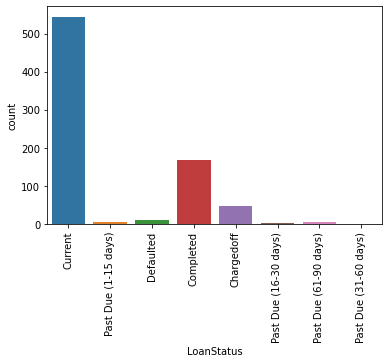

C:\Users\HP\anaconda3_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


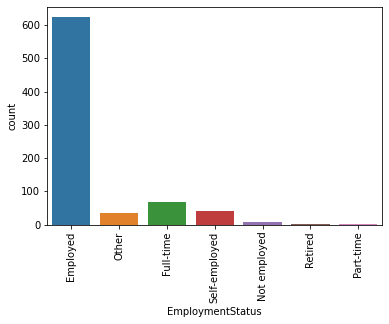

C:\Users\HP\anaconda3_new\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


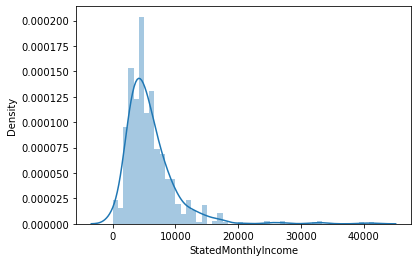

In [23]:
l=['LoanStatus','EmploymentStatus','StatedMonthlyIncome']
for i in l:
    if df1[i].dtype =='O':
        sns.countplot(df1[i])
        plt.xticks(rotation=90)
        plt.show()
    elif df1[i].dtype in (int,float):
        sns.distplot(df1[i])
        plt.show()

Loan status
* the frequency of 'current is high'
* Past due (31 -60 days) occurs least time

Employment status
* There are more number of people are job holders currenntly in given dataset
* It means it might be the imbalance dataset

Stated monthly income
* This is right skewed data where as there are more people with less stated monthly income
* very few peoples having high stated monthly income


<h4 class="list-group-item list-group-item-action active" >4. BIVARIATE ANALYSIS</h4>

>#### A. Check the correlation matrix for all numeric variables. Maintain the Strong positive and Negative correlations columns.
>#### B. Check the relation between `LoanOriginalAmount` and `BorrowerAPR` columns. 

    Step1: Use subplots. 
    
        Plot1: Scatter Plot of LoanOriginalAmount and BorrowerAPR columns    

        Plot2: HeatMap of LoanOriginalAmount and BorrowerAPR
        
    Step2: Write your observations.         
        
>#### C.Display the seperate box plot for `y = BorrowerAPR`  with x1 = `LoanStatus`, x2 = `EmploymentStatus` columns.Write your observations. 


**A. Check the correlation matrix for all numeric variables. Maintain the Strong positive and Negative correlations columns.**

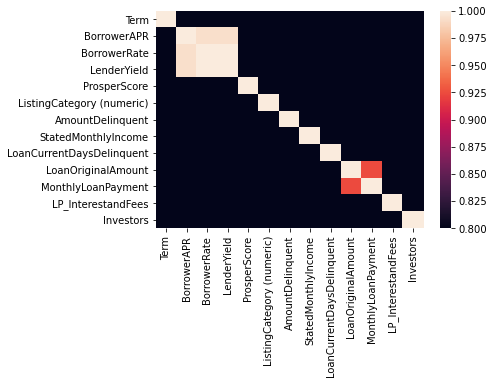

In [30]:
sns.heatmap(df1.corr(),vmin=0.8)
plt.show()

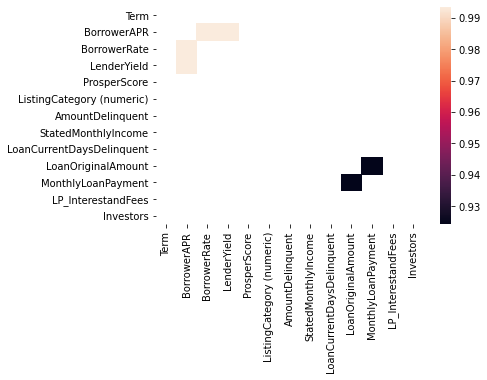

In [36]:
sns.heatmap(df1.corr()[(abs(df1.corr())>0.8) & (abs(df1.corr())<1)  ])
plt.show()

**B. Check the relation between LoanOriginalAmount and BorrowerAPR columns.**

In [57]:
df1.columns

Index(['ListingCreationDate', 'Term', 'LoanStatus', 'ClosedDate',
       'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'AmountDelinquent',
       'StatedMonthlyIncome', 'LoanCurrentDaysDelinquent',
       'LoanOriginalAmount', 'LoanOriginationDate', 'LoanOriginationQuarter',
       'MonthlyLoanPayment', 'LP_InterestandFees', 'Investors'],
      dtype='object')

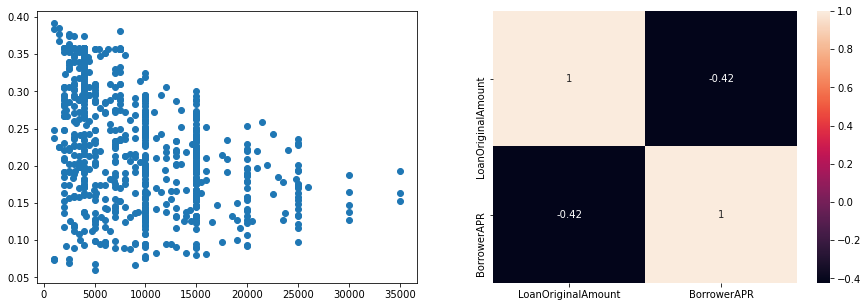

In [37]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(15,5)
ax[0].scatter(df1['LoanOriginalAmount'],df1['BorrowerAPR'])
sns.heatmap(df1[['LoanOriginalAmount','BorrowerAPR']].corr(),ax=ax[1],annot=True)
plt.show()

* Loan original amount and BorrowerARP both are negatively correlated

**C.Display the seperate box plot for y = BorrowerAPR with x1 = LoanStatus, x2 = EmploymentStatus columns.Write your observations**

In [77]:
df1.columns

Index(['ListingCreationDate', 'Term', 'LoanStatus', 'ClosedDate',
       'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'AmountDelinquent',
       'StatedMonthlyIncome', 'LoanCurrentDaysDelinquent',
       'LoanOriginalAmount', 'LoanOriginationDate', 'LoanOriginationQuarter',
       'MonthlyLoanPayment', 'LP_InterestandFees', 'Investors'],
      dtype='object')

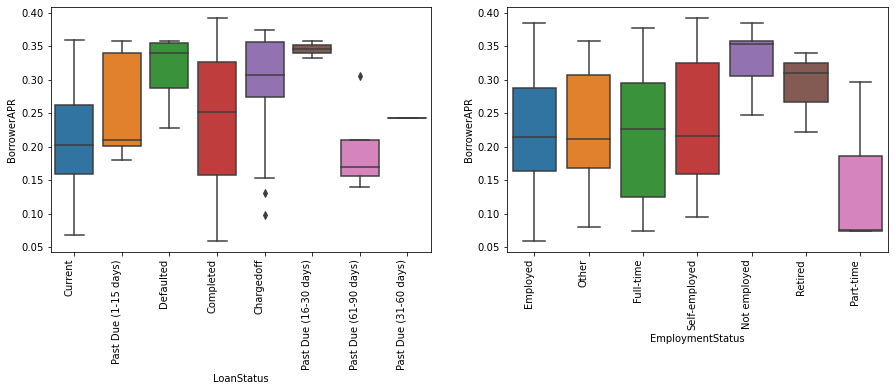

In [38]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(15,5)
plt.xticks(rotation=90)
sns.boxplot(x=df1['LoanStatus'],y=df1['BorrowerAPR'],ax=ax[0])
plt.xticks(rotation=90)
fig.autofmt_xdate(rotation=90 )

sns.boxplot(x=df1['EmploymentStatus'],y=df1['BorrowerAPR'],ax=ax[1])

plt.show()

<h4 class="list-group-item list-group-item-action active" >5.  MULTI VARIATE ANALYSIS, FEATURE ENGINEERING</h4>

>#### A. Write a program

    Step 1: Create a  condition = 'LoanStatus'== 'Completed'| 'LoanStatus' == 'Defaulted' |\'LoanStatus' == 'Chargedoff'

    Step2: Create a user define function  using condition and `LoanStatus` column.

    Hint: df['LoanStatus'] = df.apply(user define function , axis=1)
    
        Sample output : 
        
        
        Completed    168
        
        Defaulted     59


>#### B. Write a program

    Step 1: Create a  dictionary called categories = 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'

    Step2: Create a user define function  using categories and `ListingCategory (numeric)` column.

    Hint: df['ListingCategory (numeric)'] = df.apply(user define function , axis=1)
    
        Sample output : 
        
        
        Debt Consolidation    106

        Other                  65

        Business               25

        Home Improvement       22

        Auto                    9

>#### C. Display the box plot for `ProsperRating (Alpha)` vs `LoanOriginalAmount` and hue = `Loan Status`[Completed,Defaulted]. Write your observations.

>#### D. Display the catplot for `ProsperRating (Alpha)` vs `ListingCategory (numeric)`[Debt Consolidation,Other,Business,Home Improvement,Auto] and hue = `Loan Status`[Completed,Defaulted]. Write your observations.

**A**

In [40]:
df1['LoanStatus'].unique()

array(['Current', 'Past Due (1-15 days)', 'Defaulted', 'Completed',
       'Chargedoff', 'Past Due (16-30 days)', 'Past Due (61-90 days)',
       'Past Due (31-60 days)'], dtype=object)

In [67]:
r_col=df1['LoanStatus'][df1['LoanStatus'].isin(['Completed','Defaulted','Chargedoff'])]
r_col.value_counts()

Completed     168
Chargedoff     48
Defaulted      11
Name: LoanStatus, dtype: int64

In [77]:
def count_given(col):
    completed=0
    defaulted=0
    for i in col:
        if i=='Completed':
            completed+=1
        if i== 'Defaulted' or i=='Chargedoff':
            defaulted+=1
    m=f'Completd  {completed} Defaulted {defaulted}'
    return m
        

In [78]:

count_given(df1['LoanStatus'])

'Completd  168 Defaulted 59'

In [80]:
df1.columns

Index(['ListingCreationDate', 'Term', 'LoanStatus', 'ClosedDate',
       'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'AmountDelinquent',
       'StatedMonthlyIncome', 'LoanCurrentDaysDelinquent',
       'LoanOriginalAmount', 'LoanOriginationDate', 'LoanOriginationQuarter',
       'MonthlyLoanPayment', 'LP_InterestandFees', 'Investors'],
      dtype='object')

**B**

In [86]:
d={ 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}
m=dict.fromkeys([1,2,3,6,7],0)
def count_val(col):
    for i in col:
        if i in m:
            m[i]+=1
    return list(zip(d.values(),m.values()))
print(count_val(df1['ListingCategory (numeric)']))

[('Debt Consolidation', 483), ('Home Improvement', 68), ('Business', 41), ('Auto', 22), ('Other', 80)]


**C**

In [108]:
m=df1['LoanStatus'][df1['LoanStatus']=='Completed']
data=df1[df1.LoanStatus.isin(['Completed','Defaulted'])]
data

,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),...,EmploymentStatus,AmountDelinquent,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,LP_InterestandFees,Investors
15,2012-04-10 09:14:46.297,36,Defaulted,NaT,0.35797,0.3177,0.3077,HR,5.0,13,...,Other,0.0,5500.000000,140,4000,NaT,Q2 2012,173.71,311.38,10
23,2013-04-22 13:29:19.073,36,Defaulted,NaT,0.28032,0.2419,0.2319,D,5.0,15,...,Employed,0.0,2500.000000,193,2000,NaT,Q2 2013,78.67,118.28,30
26,2013-02-12 18:07:31.690,60,Completed,NaT,0.30748,0.2809,0.2709,E,3.0,1,...,Employed,0.0,3885.916667,0,4000,NaT,Q1 2013,124.76,725.35,37
27,2010-06-16 16:23:44.533,36,Completed,NaT,0.11296,0.0920,0.0820,A,9.0,1,...,Full-time,0.0,6666.666667,0,4000,NaT,Q2 2010,0.00,594.48,121
30,2012-01-30 17:59:17.200,36,Completed,NaT,0.12782,0.0999,0.0899,A,9.0,20,...,Employed,42488.0,3750.000000,0,10000,NaT,Q1 2012,322.62,686.32,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,2011-04-06 13:51:20.827,36,Completed,NaT,0.34887,0.3125,0.3025,HR,4.0,7,...,Employed,0.0,6833.333333,0,3000,NaT,Q2 2011,129.42,35.96,30
1013,2009-12-09 10:30:37.397,36,Completed,NaT,0.07339,0.0700,0.0600,AA,10.0,3,...,Full-time,0.0,5000.000000,0,1000,NaT,Q4 2009,30.88,60.11,47
1018,2012-09-10 15:22:22.187,36,Completed,NaT,0.28339,0.2449,0.2349,D,7.0,13,...,Employed,3606.0,4166.666667,0,9000,NaT,Q3 2012,355.42,2086.23,181
1022,2009-11-14 21:53:13.970,36,Completed,NaT,0.12511,0.1040,0.0940,A,9.0,7,...,Full-time,0.0,3416.666667,0,5000,NaT,Q4 2009,162.28,841.15,158


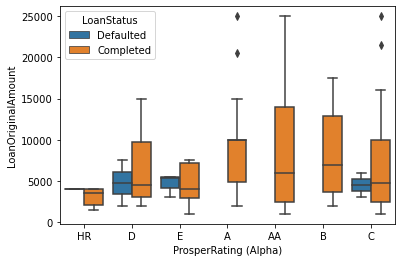

In [109]:
sns.boxplot(data=data,x='ProsperRating (Alpha)',y='LoanOriginalAmount',hue='LoanStatus')
plt.show()

* There are many ProsperRating (Alpha) without Defaulted loan status

**D. Display the catplot for ProsperRating (Alpha) vs ListingCategory (numeric)[Debt Consolidation,Other,Business,Home Improvement,Auto] and hue = Loan Status[Completed,Defaulted]. Write your observations.**

In [113]:
dt=df1[df1.LoanStatus.isin(['Completed','Defaulted'])]

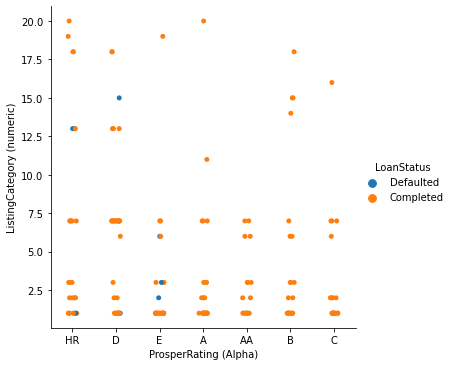

In [116]:
sns.catplot(data=dt,x='ProsperRating (Alpha)',y='ListingCategory (numeric)',hue='LoanStatus')
plt.show()

In [1]:
import pandas as pd

In [ ]:
pd.read_csv()

In [3]:
from scipy import stats

In [ ]:
stats.probplot()

In [4]:
from scipy.stats import norm

In [7]:
norm.interval(0.997)

(-2.9677379253417833, 2.9677379253417717)

In [11]:
norm.cdf(12,9,1)

0.9986501019683699

In [12]:
from scipy.stats import binom

In [29]:
binom.cdf(2,8,0.5)

0.14453124999999994

In [18]:
import math

In [35]:
n=8
m=combination(n,0)*(p**0)*(p**8)
y=combination(n,1)*(p**1)*(p**7)
x=combination(n,2)*(p**2)*(p**6)

In [36]:
m+x+y

0.14453125

In [31]:
math.factorial(0)

1

In [19]:
def combination(n,r):
    return math.factorial(n)/(math.factorial(n-r)*math.factorial(r))

In [28]:
n=8
r=2
p=0.5
a=combination(n,r)
b=p**r
c=(1-p)**(n-r)
a*b*c


0.109375

In [21]:
a

28.0

In [22]:
b

0.25

In [27]:
0.5**6

0.015625

In [24]:
a*b*c

-13.97265625

In [40]:
binom.isf(0.109375/2,8,0.5)

6.0

In [42]:
round(binom.pmf(35,50,11/15),3)

0.107

In [43]:
from scipy.stats import poisson

In [44]:
n=10000
x=5
p=0.0005
binom.pmf(x,n,p)

0.1755112523369762

In [46]:
poisson.pmf(x,n*p)

0.17546736976785068

In [48]:
norm.sf(513.5,500,10)

0.08850799143740196

In [49]:
import random as r

In [51]:
list(range(r.randint(1,100),100,5))

[34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 89, 94, 99]

In [53]:
np.linspace(1,10,20)

<IPython.core.display.Javascript object>

array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])

In [54]:
from scipy.stats import uniform

In [58]:
uniform.cdf(1,1,10)

0.0

In [60]:
r.randint.pmf(1,10)

AttributeError: 'function' object has no attribute 'pmf'

In [61]:
import scipy

In [62]:
scipy.stats.randint.pmf(3,2,5)

0.3333333333333333

In [66]:
from statsmodels.stats.proportion import proportions_ztest

In [73]:
proportions_ztest(105,361,0.25,alternative='larger')

(1.709349971523915, 0.04369307100439014)

In [72]:
 0.08738614200878028/2

0.04369307100439014

In [75]:
proportions_ztest([78,65],[100,70],alternative='smaller')

(-2.60830803458311, 0.004549551600547303)

In [77]:
from scipy.stats.stats import ranksums